In [5]:
from __future__ import division

# Chapter 1 Questions

**Question 1.1**

*List three different real networks and state the nodes and links for each of them.*

**Answer**

The internet
* Servers and clients (nodes)
* Physical wires and radio communication (links)
    
The brain
* Neurons (nodes)
* Synapses (links)

A social network - ex Facebook
* User accounts (nodes)
* Friendships (links)

**Question 1.2**

*Tell us of the network you are personally most interested in. Address the following questions:*

* *What are its nodes and links?*
* *How large is it?*
* *Can be mapped out?*
* *Why do you care about it?*


**Answer**

Nodes: Twitter user accounts
Links: "Follows" which is a directed relation between two users

Size: As of 2018 Twitter has accumulated [68M](https://www.statista.com/statistics/274564/monthly-active-twitter-users-in-the-united-states/) monthly active users

Mapping out: Twitter is very open since any public profile (which most profiles are) have their followers (incoming links) displayed.

Why: Twitter has gained a lot of attention the recent years; Donald Trump uses Twitter as a primary outlet, and in the fall of 2017 cryptocurrency was at it's peak with the main news source being reddit and twitter

**Alternative Answer**

*Reddit.com*

Nodes: ??

Links: ??

Size: As of 2018 Twitter has accumulated [234M unique](https://en.wikipedia.org/wiki/Reddit) monthly active users

**Question 1.3**

*In your view what would be the area where network science could have the biggest impact in the next decade? Explain your answer - and base it on the text in the book*

Predicting election outcomes and stock prices based on publicly available social media data. 

Although both of these things could be cannibalized by analyzing it - if everyone thinks a stock is going up because people are talking about it, they will buy it. 

However once the sentiment turns around and the stock is dumped or shorted by enough people, it will turn around rapidly

# Chapter 2 Questions

### Question 2.1

*Section 2.5 states that real networks are sparse. Can you think of a real network where each node has many connections? Is that network still sparse? If yes, can you explain why?*

**Answer**

Facebook is a network that has a large number of connections globally.

In order for the network to be dense, or have the maximum amount of links possible, every user would have to be friend with every other user, of which there are almost [2.3 Billion](https://www.statista.com/statistics/264810/number-of-monthly-active-facebook-users-worldwide/) as of Q2 2018. 

Currently there is a friend list size limit of 5000 which makes the upper bound something along the lines of:

$L = 5000 \frac{friendships}{user} \cdot 2,3 \cdot 10^{9} users = 1.15 \cdot 10^{13} friendships$

The network is therefore still a sparse one since the number of links ($L$) is smaller than $L_{max} = \frac{(2,3 \cdot 10^{9})^2}{2} = 2.645 \cdot 10^{18}$


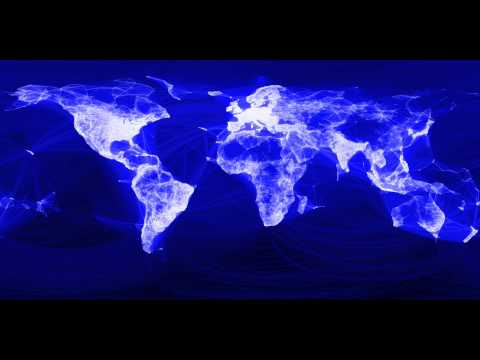

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("GK_3etS8GEc",width=800, height=450)

### Exercise 2.1 - Königsberg Problem

*An undirected graph has an Eulerian trail if and only if exactly zero or two vertices have odd degree, and all of its vertices with nonzero degree belong to a single connected component.*
https://en.wikipedia.org/wiki/Eulerian_path#Properties

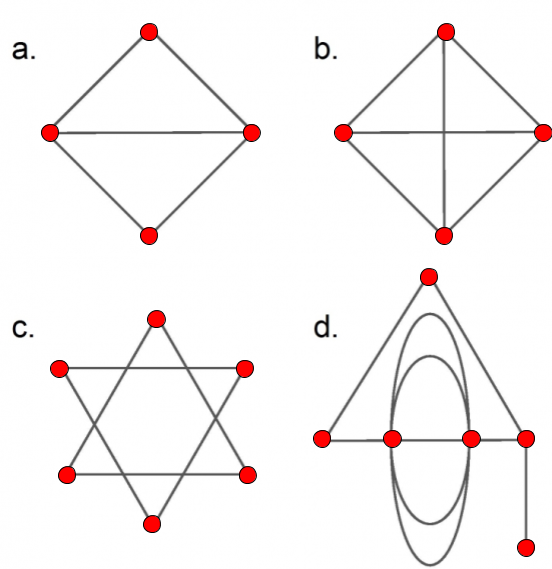

In [2]:
from IPython.display import Image
Image("ex-2-1.png")

*If a graph has an Eulerian trail, it can be drawn without lifting the pencil, and without drawing any line more than once.*

**(A)** $N_{odd} = 2$ which means the graph has an Eulerian path.

**(B)** $N_{odd} = 3$ which means the graph does **not** have an Eulerian path.

**(C)** $N_{odd} = 0$ which means the graph has an Eulerian path.

**(D)** $N_{odd} = 2$ which means the graph has an Eulerian path.

### 2.2 Matrix Formalism

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_edges_from([("a", "b"), ("a", "c"), ("b", "f"), ("c", "d"), ("c", "e"), ("e", "d")])

# Plotting
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

<Figure size 640x480 with 1 Axes>

**Adjacency Matrix for G**


In [4]:
print nx.adjacency_matrix(G).todense()

[[0 1 1 0 0 0]
 [1 0 0 1 1 0]
 [1 0 0 0 0 1]
 [0 1 0 0 1 0]
 [0 1 0 1 0 0]
 [0 0 1 0 0 0]]


**Creating a vector ($k$) containing the degree of each node**

This is done by multiplying the adjacency matrix $A$ with a vector of all ones $v$, effectively summing the rows of A. This can be written as $k = A^1 \cdot v$. The power of $A$ is useful later.

In [5]:
import numpy as np

A = np.mat(nx.adjacency_matrix(G).todense())
N = len(A)
v = np.ones(N)

k = np.dot(A, v)
print "k = ", k

k =  [[2. 3. 2. 2. 2. 1.]]


**Number of links in G**

This can be calculated by summing all degrees, ie. $sum(k)$, and dividing by 2, since G is undirected, and edges therefore count twice in the adjancency matrix. We are not allowed to use a summation here, so instead it is possible to calculate the scalar product of $k$ and $v$.

In [6]:
L = np.dot(k, v) / 2
print "L = ", L

L =  [[6.]]


**Number of triangles in G**

A triangle is defined as a cycle of length 3. This can be calculated using the trace of the adjacency matrix to the power of the cycle length (i.e. $A^3$ in this case).

The number of cycles in G, given the cycle length $l_c$ can be calculated as $N_c = \frac{trace(A^)}{}$

In [7]:
cl = 3
print "Number of Triangles in G = ", np.trace(A**cl) / (2 * cl)

Number of Triangles in G =  1


**A vector ($k_{nnn}$) representing the $sum(d)$ of every neighbour of every node in G**

Similar to how $k = k_n = A^1 \cdot v$), the degree of each node, was calculated , $k{nn}$ is calculated by using the power $2$ instead.

In [8]:
knn = np.dot(A**2, v)
print "knn = ", knn

knn =  [[5. 6. 3. 5. 5. 2.]]


**A vector ($k_{nnn}$) representing the $sum(d)$ of every second neighbour of every node in G**

Similar to $k_{nn}$, $k_{nnn}$ is calculated using the power 3.

In [9]:
knnn = np.dot(A**3, v)
print "knnn = ", knnn

knnn =  [[ 9. 15.  7. 11. 11.  3.]]


### 2.3 Graph Representation

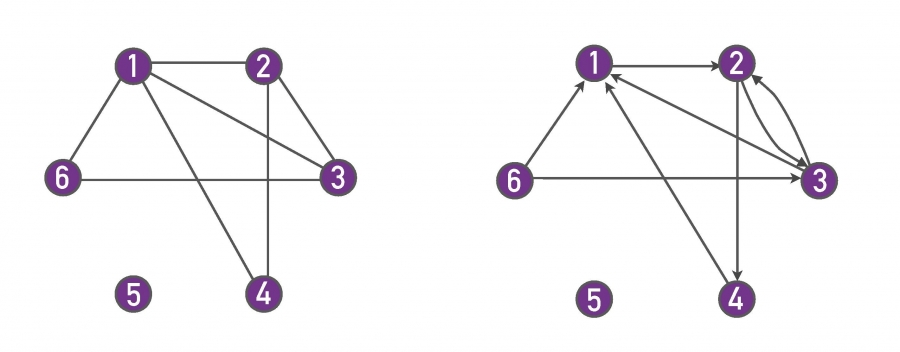

In [10]:
Image("2-20.jpg")

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

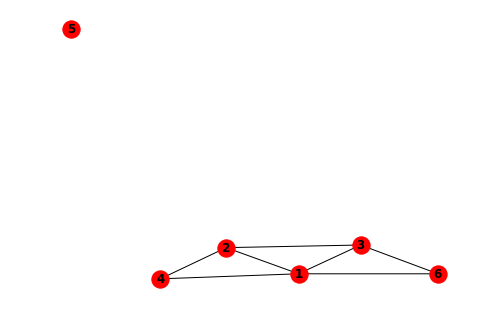

In [12]:
UG = nx.Graph()
UG.add_edges_from([(1, 2), (1, 3), (1,4), (1,6), (2,3), (2,4), (3,6)])
UG.add_node(5)

# Plotting
nx.draw(UG, with_labels=True, font_weight='bold')
plt.show()

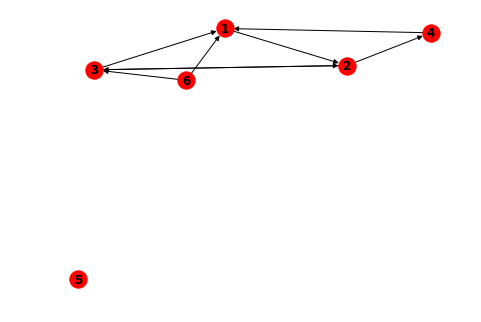

In [13]:
DG = nx.DiGraph()
DG.add_edges_from([(1,2), (2,3), (2,4), (3,1), (3,2), (4,1), (6,1), (6,3)])
DG.add_node(5) # Add the lonely node (5)

# Plotting
nx.draw(DG, with_labels=True, font_weight='bold')
plt.show()

**Adjacency Matrices**

In [14]:
A_UG = nx.adjacency_matrix(UG).todense()
A_DG = nx.adjacency_matrix(DG).todense()

print "Undirected Graph Matrix:\n", A_UG, "\n"

print "Directed Graph Matrix:\n", A_DG, "\n"

Undirected Graph Matrix:
[[0 1 1 1 0 1]
 [1 0 1 1 0 0]
 [1 1 0 0 0 1]
 [1 1 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 1 0 0 0]] 

Directed Graph Matrix:
[[0 1 0 0 0 0]
 [0 0 1 1 0 0]
 [1 1 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 1 0 0 0]] 



**Edge List**

In [15]:
print "Undirected:", UG.edges()
print "Directed:", DG.edges()

Undirected: [(1, 2), (1, 3), (1, 4), (1, 6), (2, 3), (2, 4), (3, 6)]
Directed: [(1, 2), (2, 3), (2, 4), (3, 1), (3, 2), (4, 1), (6, 1), (6, 3)]


**Determine the average clustering coefficient of the network shown in Image 2.20a**

In [16]:
print "Average Clustering Coeff. (G):", nx.average_clustering(UG)

Average Clustering Coeff. (G): 0.638888888889


**If you switch the labels of nodes 5 and 6 in Image 2.20a, how does that move change the adjacency matrix? And the link list?**

In [17]:
UG2 = nx.Graph()
UG2.add_edges_from([(1, 2), (1, 3), (1,4), (1,5), (2,3), (2,4), (3,5)])
UG2.add_node(6)

In [18]:
A_UG2 = nx.adjacency_matrix(UG2).todense()

print "Old Adj. Matrix:\n", A_UG, "\n"
print "New Adj. Matrix:\n", A_UG2, "\n"

print "Old Edgelist:", UG.edges()
print "New Edgelist:", UG2.edges()

Old Adj. Matrix:
[[0 1 1 1 0 1]
 [1 0 1 1 0 0]
 [1 1 0 0 0 1]
 [1 1 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 1 0 0 0]] 

New Adj. Matrix:
[[0 1 1 1 1 0]
 [1 0 1 1 0 0]
 [1 1 0 0 1 0]
 [1 1 0 0 0 0]
 [1 0 1 0 0 0]
 [0 0 0 0 0 0]] 

Old Edgelist: [(1, 2), (1, 3), (1, 4), (1, 6), (2, 3), (2, 4), (3, 6)]
New Edgelist: [(1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (3, 5)]


**What kind of information can you not infer from the link list representation of the network that you can infer from the adjacency matrix?**

Matrix operations cannot be applied to find degrees of nodes, and other attributes from exercise 2.2

**In the (a) network, how many paths (with possible repetition of nodes and links) of length 3 exist starting from node 1 and ending at node 3? And in (b)?**

The method used is from Box 2.4 in the book, which applies matrix operations to the adjacency matrix.

*Undirected Graph*

In [19]:
import numpy as np
n = 3
A_UG3 = np.mat(A_UG) ** n
print "N(3) of Undirected graph:", A_UG3[0, 2]

N(3) of Undirected graph: 7


*Directed Graph*

In [20]:
A_DG3 = np.mat(A_DG) ** n
print "N(3) of Directed graph:", A_DG3[0, 2]

N(3) of Directed graph: 0


**Number of cycles of length 4**

This can be done using the same method as calculating triangles, i.e. cycles of length 3 - just set number of cycles to 4 instead.

The formula used is: $C^{(n)} = \frac{Trace(A^n)}{2n}$ for an undirected graph.

The formula used is: $C^{(n)} = \frac{Trace(A^n)}{n}$ for a directed graph.

Where $n = 4$

In [21]:
n = 4
print "Cycles of Length 4 in Undirected graph: ", np.trace(A_UG ** n) / (2 * n)
print "Cycles of Length 4 in Directed graph: ", np.trace(A_DG ** n) / n 

Cycles of Length 4 in Undirected graph:  10
Cycles of Length 4 in Directed graph:  0


## Exercise 2.5: Bipartite Networks

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from networkx.algorithms import bipartite

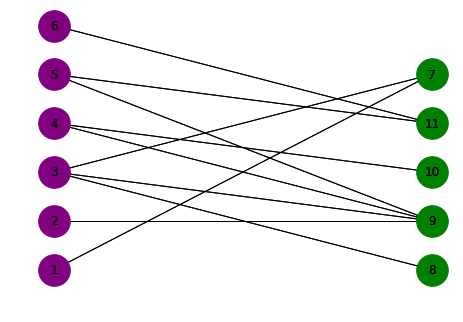

In [22]:
edge_list = [(1,7), (2,9), (3,7), (3,8), (3,9), (4,9), (4,10), (5,9), (5,11), (6,11)]
B = nx.Graph()
purple, green = [1,2,3,4,5,6], [7,8,9,10,11]
B.add_nodes_from(purple, bipartite=0)
B.add_nodes_from(green, bipartite=1)
B.add_edges_from(edge_list)

edges = B.edges()
X, Y = bipartite.sets(B)
pos = dict()
pos.update( (n, (1, i)) for i, n in enumerate(X) ) # put nodes from X at x=1
pos.update( (n, (2, i)) for i, n in enumerate(Y) ) # put nodes from Y at x=2
nx.draw(B, pos=pos, edges=edges, nodelist=purple, with_labels=True, node_color="purple", node_size=1000)
nx.draw(B, pos=pos, edges=edges, nodelist=green, with_labels=True, node_color="green", node_size=1000)
plt.show()

**Construct its adjacency matrix. Why is it a block-diagonal matrix?**

Answer: *The adjacency is symmetric because the graph is undirected.*

In [26]:
A = nx.adjacency_matrix(B).todense()
A

matrix([[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0]])

**Construct the adjacency matrix of its two projections, on the purple and on the green nodes, respectively.**

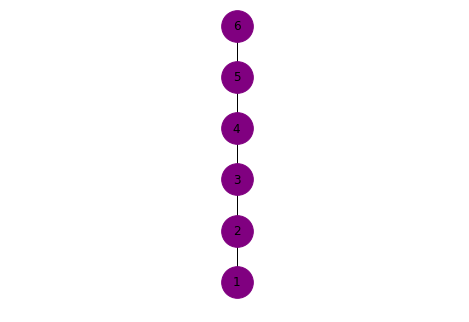

In [32]:
proj_purple = bipartite.projected_graph(B, purple, multigraph=True)
nx.draw(proj_purple, pos=pos, edges=edges, nodelist=purple, with_labels=True, node_color="purple", node_size=1000)

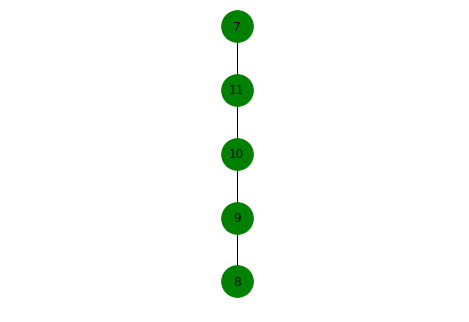

In [34]:
proj_green = bipartite.projected_graph(B, green, multigraph=True)
nx.draw(proj_green, pos=pos, edges=edges, nodelist=green, with_labels=True, node_color="green", node_size=1000)

**Calculate the average degree of the purple nodes and the average degree of the green nodes in the bipartite network.**

*Using NetworkX*

In [52]:
print "Purple nodes <k>:", np.mean(dict(B.degree(purple)).values())
print "Green nodes <k>:", np.mean(dict(B.degree(green)).values())

Purple nodes <k>: 1.6666666666666667
Green nodes <k>: 2.0


*Using Matrix operations*

In [87]:
v = np.ones(len(A)) # row vector of ones, same rows as A

print "Purple nodes <k>:", np.mean(np.dot(A[0:6], v))
print "Green nodes <k>:", np.mean(np.dot(A[6:10], v))

Purple nodes <k>: 1.6666666666666667
Green nodes <k>: 2.0


**Calculate the average degree in each of the two network projections. Is it surprising that the values are different from those obtained in point (c)?**

*Using NetworkX*

In [93]:
print "Purple nodes <k>:", np.mean(dict(proj_purple.degree()).values())
print "Green nodes <k>:", np.mean(dict(proj_green.degree()).values())

Purple nodes <k>: 2.6666666666666665
Green nodes <k>: 2.0


*Using Matrix operations*

In [94]:
A_purple = nx.adjacency_matrix(proj_purple).todense()
A_green = nx.adjacency_matrix(proj_green).todense()
u, v = np.ones(len(A_purple)), np.ones(len(A_green))

print "Purple Projection <k>:", np.mean(np.dot(A_purple, u))
print "Green Projection <k>:", np.mean(np.dot(A_green, v))

Purple Projection <k>: 2.6666666666666665
Green Projection <k>: 2.0


## Part 3: Plotting Edge Distributions

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

### Binning real numbers

In [23]:
mu, sigma = 2, 0.125 # mean and standard deviation
n = 10
s = np.random.normal(mu, sigma, 5000)

In [42]:
h = np.histogram(s, bins=n)

# Use averages of edges as x-coordinates
freqs, edges = h[0], h[1]
means = [(edges[i] + edges[i+1]) / 2 for i in range(n)]

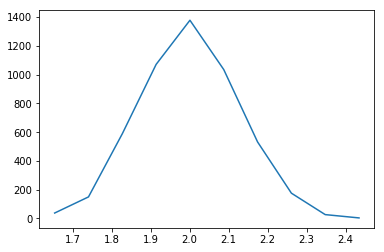

In [43]:
plt.plot(means, freqs)
plt.show()

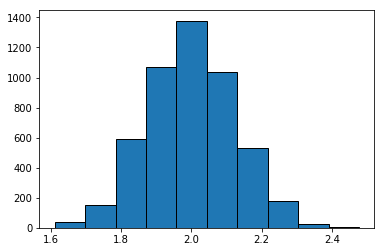

In [44]:
plt.hist(s, bins=10, edgecolor="black")
plt.show()

### Binning integers

In [59]:
lam, N = 10, 5000
X = np.random.poisson(lam, N)
print "Min(X) =", min(X)
print "Max(X) =", max(X)

Min(X) = 1
Max(X) = 26


In [64]:
v = np.arange(min(X), max(X)+1)
hist = np.histogram(X, bins=v)

freqs, edges = hist[0], hist[1]
n = freqs.size
means = [(edges[i] + edges[i+1]) / 2 for i in range(n)]

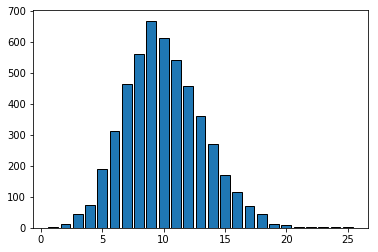

In [66]:
plt.bar(means, freqs, edgecolor="black")
plt.show()

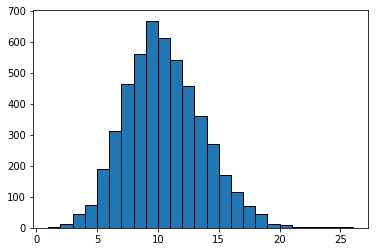

In [67]:
plt.hist(X, bins=v, edgecolor="black")
plt.show()

### Binning and plotting degree distributions.

#### Erdös-Renyi Network

$<k> = p(N-1)$

In [189]:
import matplotlib.pyplot as plt
from networkx import nx
import networkx.generators.random_graphs as rg

N = 5000
k = 10.0
p = k / (N - 1)
print "p =", p

p = 0.00200040008002


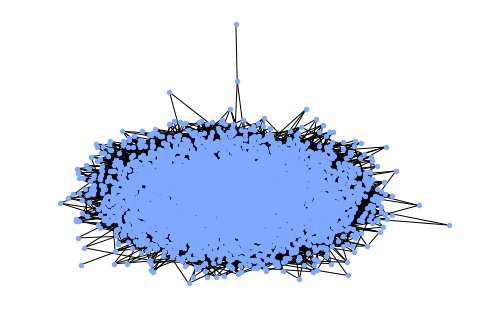

In [98]:
G = rg.erdos_renyi_graph(N, p)
nx.draw_spring(G, node_size=20, node_color="#7fa8ff")
plt.show()

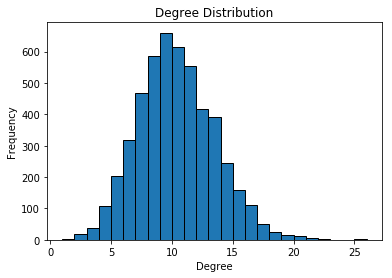

In [126]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
plt.hist(degree_sequence, bins=v, edgecolor="black")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution")
plt.show()

### Part 4: Random Networks

**Homework 3.1**

Erdös-Rényi Network, $N=3000, p = 10^{-3}$

**(A) What is the expected number of links, 〈L〉?**

$<L> = p \frac{N(N-1)}{2}$

In [191]:
N,p = 3000, 1e-3

In [192]:
L_e = p * N * (N - 1) / 2
print "<L> =", L_e

<L> = 4498.5


**(B) In which regime is the network?**

In [193]:
print "Subcritical: ", p < 1/N
print "Critical: ", p == 1/N
print "Supercritical: ", p > 1/N
print "Connected: ", p > np.log(N)/N

Subcritical:  False
Critical:  False
Supercritical:  True
Connected:  False


**(C) Calculate the probability pc so that the network is at the critical point**

$p_c = \frac{1}{N-1}$

In [200]:
p_c = 1.0 / (N - 1)
print "p_c =", p_c

p_c = 0.000333444481494


**(D) Given the linking probability p = 10–3, calculate the number of nodes $N_{cr}$ so that the network has only one component.**

$N_{cr} = N_G \approx (p-p_c) \cdot N$ for a supercritical network.

In [201]:
N_cr = (p - p_c) * N
print "N_cr =", N_cr

N_cr = 1.99966655552


**(E) For the network in (D), calculate the average degree $〈k_{cr}〉$and the average distance between two randomly chosen nodes $〈d〉$.**

Average degree: $<k> = p_{cr} \cdot (N_{cr} - 1)$

Average distance: $<d> = \frac{ln(N)}{ln(<k>)}$

In [216]:
G = rg.erdos_renyi_graph(N, p_c)
k_cr = np.mean(dict(G.degree()).values())
print "<k_cr> =", k_cr

<k_cr> = 0.9733333333333334


In [217]:
np.log(N) / np.log(k_cr)

-296.217566765461

In [34]:
k_cr = p_c * (N_cr - 1)
d_e = np.log(N_cr) / np.log(k_cr)

print "<k_cr> =", k_e
print "<d> =", d_e

<k_cr> = 0.000333333296272
<d> = -0.08655366231198297


**(F) Calculate the degree distribution pk of this network (approximate with a Poisson degree distribution).**

$p_k = e^{-<k>} \cdot \frac{<k>}{k!}$

### Paths

Given $<k> = 1.5$ and $N = 200$, plot a random network.

$<k> = p(N-1)$ meaning $p$ is found as $p = \frac{<k>}{N-1}$

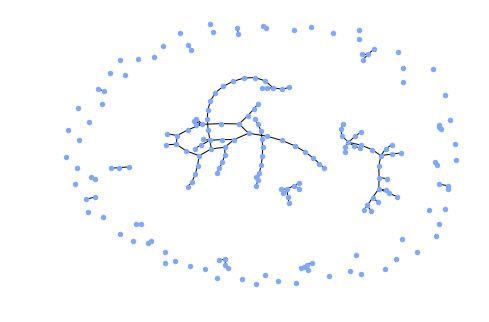

In [175]:
import matplotlib.pyplot as plt
from networkx import nx
import networkx.generators.random_graphs as rg

N, k_e  = 200, 1.5
p = k_e / (N - 1)

G = rg.erdos_renyi_graph(N, p)
nx.draw(G, node_size=20, node_color="#7fa8ff")
plt.show()

**Largest component $G_c$**

In [176]:
Gc = max(nx.connected_component_subgraphs(G), key=len)

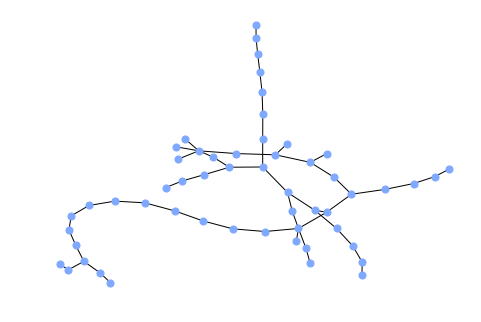

In [177]:
nx.draw(Gc, node_size=50, node_color="#7fa8ff")
plt.show()

**Choose a node at random from the GCC. Find all nodes that are precisely 2 steps away from that node. **

**Plot the GCC with the following choice of colors: **
* Starting node black ("#000000"). 
* The nodes 2 steps away red ("#ff0000"). 
* All other nodes blue ("#A0CBE2").

In [178]:
import random
Gc_nodes = list(Gc.nodes)
node = random.choice(Gc_nodes)
distances = np.array(nx.single_source_shortest_path_length(G, node).values())

In [187]:
color_map = []
for d in distances:
    if d == 0: 
        color_map.append("black")
    elif d == 2: 
        color_map.append("red")
    else: 
        color_map.append("#A0CBE2")

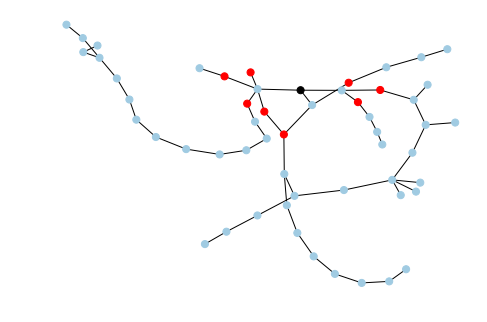

In [188]:
nx.draw(Gc, node_color=color_map, node_size=50)
plt.show()